<a href="https://colab.research.google.com/github/AdriVilla/Linear-Regression/blob/main/SLF_Project_FullCode_AdrianaVilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [5]:
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))
#data = pd.read_csv("used_device_data.csv")
#df = data.copy()
df = df2.copy()

Saving used_device_data.csv to used_device_data (2).csv


## Data Overview

- Observations
- Sanity checks

In [6]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [7]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 15 variables from which 9 are float64, 2 are int64 and 4 are objects.

* `release year`is a variable class int64, and might be good to change it to object (categorical) to transform it into dummies for the model to run correctly. 

* We can observe there are missing values in the variables `main_camera_mp`, `selfie_camera_mp`,`int_memory`, `ram`, `battery`, `weight`.

In [9]:
df.shape

(3454, 15)

* This data set has 3,454 observations and 15 variables. 

In [10]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


* `brand_name`: It is an object variable with 3454 observations with 34 unique brands where the category "Others" is the most frequent value.
* `os`: It is an object variable with 3454 observations with 4 unique values where "Android" is the most frequent one.
* `4g`: It's a categorical variable with 2 unique values (yes/no), where "yes" is the most frequent value. It has 3454 observations.
* `5g`: It is a categorical variable with 2 unique values (yes/no), where "no" is the most frequent one. It has 3454 observations.


* `screen_size`: This is a numerical variable where the median value is 12.83 cm. The minimum value is 5.08 cm (2 inches) which can correspond to observations of basic phones such as the ones offered by Alcatel, while the maximum value is 30.71 cm (12.5 inches) which may correspond to smart tablets.
* `main_camera_mp`: This is a numerical variable with a maximum value of 48 mp and a minimum value of 0.08 mp. Very basic cell phones do have this minimum mp value. The median value is 8 mp, and there are missing values. 
* `selfie_camera_mp`: This is a numerical variable with a minimum value of 0 and a maximum value of 32 mp. Basic cell phones do not have selfie cameras for which a value of 0 makes sense. The median mp value is 5 and there are missing values. 
* `int_memory`: This is a numerical variable with a minimum value of 0.01 GB and a max value of 1024 GB. The median value is 32 GB. Very basic cell phones have 32.5 KB (3.45 e-5 GB)internal memory therefore this min value is plausible. On the other hand,  1024 GB can be found in smart tablets and cell phones with extended memory capabilities. There are some missing values.
* `ram`: It is a numerical variable with a max value of 12 GB and a min value of 0.02 GB. The median value is 4 GB and there are missing values.
* `battery`: This is a numerical variable with a min value of 500 mAh and a max value of 9720 mAh.The median value is 3000, and there are missing values. This min value makes sense for basic cell phones, and this max value makes sense for tablets and phones that had a battery power addition. 
* `weight`: This is a numerical variable with a maximum value of 855 grams and a minimum value of 69 grams. The median value is 160 grams, and the variable has missing values.
* `release_year`: This is a numerical variable with a maximum value of 2020 and a minimum value of 2013. This variable should be changed to categorical to make it a dummy and run the model.
* `days_used`: This is a numerical variable with a maximum value of 1094 days of use and a minimum value of 91 days of use. The median time of days of use is 690.5 days.
* `normalized_used_price`: This is a numerical variable that was normalized, therefore the max value is 6.62, the min value is 1.54, and the median value is 4.41. This variable should have a normal distribution.
* `normalized_new_price`: This is a numerical variable that was normalized, therefore the max value is 7.85, the min value is 2.90 and the median value is 5.67. This variable should have a normal distribution.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

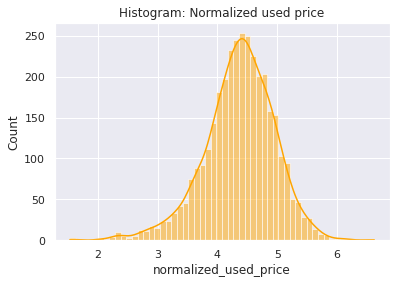

In [11]:
# What does the distribution of normalized used device prices look like?

sns.histplot(data=df, x='normalized_used_price',color='orange', kde = True)
plt.title('Histogram: Normalized used price');

* `normalized used`has a normal distribution slightly skewed to the left. 

In [12]:
# What percentage of the used device market is dominated by Android devices?
print(df["os"].value_counts())
print(df["os"].value_counts(normalize = True))

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64


* Android has 93% of the european market (prices were in euros before being normalized).
* iOS has only 1% of the market.

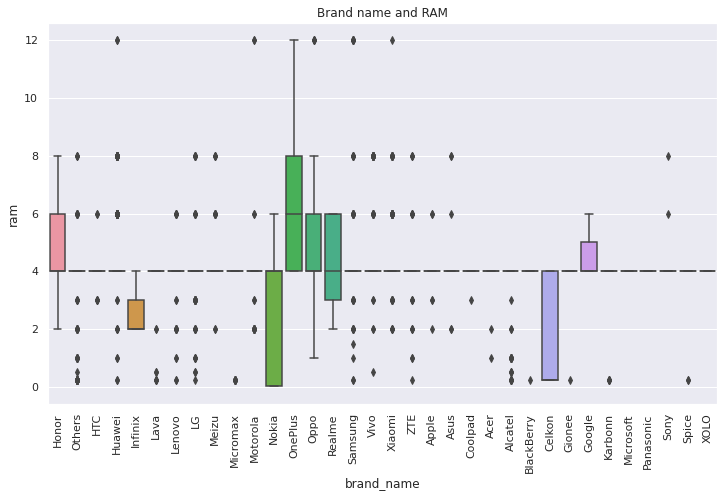

In [13]:
# How does the amount of RAM vary with the brand?
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.boxplot(data = df, y= 'ram', x= 'brand_name')
plt.title("Brand name and RAM") ;

* There are brands such as Xolo, Panasonic, and Microsoft that only offer 4 GB of RAM.
* Brands such as Honor, Nokia, OnePlus, Oppo, Realme, Celkon, Google, and Infinix offer a larger range of RAM possibilities. Specific cases such as Celkon only offer gadgets with RAM ranging from 0.5 GB minimum to 4 GB maximum, while on the contrary, OnePlus only offers gadgets with RAM above 4 GB minimum to 12 GB maximum.
* The other brands (the ones that are only showcased by dots) have a median of 4 GB and offer specific RAM capacities (not a range). 


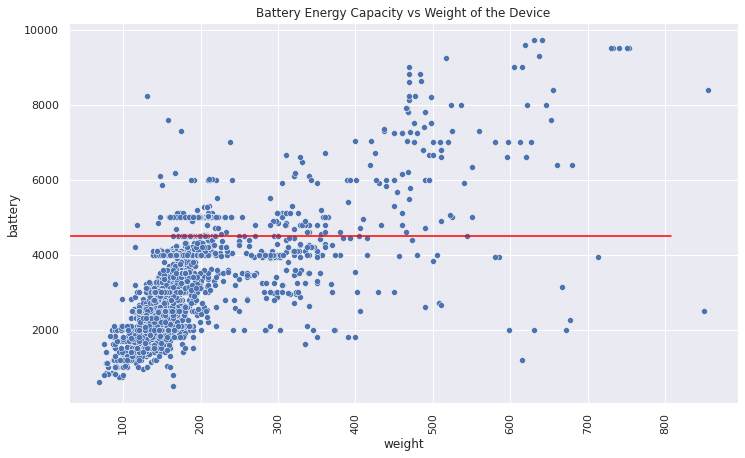

In [14]:
# How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.axhline(y=4500, xmin=0, xmax=0.9, c= 'red')
sns.scatterplot(data = df, x= 'weight', y= 'battery')
plt.title("Battery Energy Capacity vs Weight of the Device") ;

There is a clear positive correlation between weight and battery. As battery power (mAh)increases, the weight of the gadget increases too.

Batteries with capacities between 1000-4500 have a narrow positive linear relationship. As gadgets have battery powers above 4500 this linear positive relationship prevails but it's softer. 

The majority of the observations are between weights 50 grams - 350 grams and from 1000 mAh to 4500 mAh.

For gadgets with battery capacity above 4500, it seems there are new technologies that can manufacture batteries with high power capacity that weigh little but also vice versa; old technology with batteries with low capacity and high weight.

In [15]:
# How many phones and tablets are available across different brands with a screen size larger than 6 inches?
dfinch = df.copy()

In [16]:
dfinch.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [17]:
# New Data Frame to add an extra column with screen size in inches
dfinch['screen_size_inches'] = dfinch['screen_size']/2.54

In [18]:
df_inch6 = dfinch[dfinch['screen_size_inches'] > 6]
df_inch6.shape[0]

1099

There are only 1099 observations with phones and tablets with screen sizes above 6 inches. This means that 31.81% of the observations correspond to phones and tablets with screen sizes above 6 inches.

In [19]:
# What is the distribution of devices offering greater than 8MP selfie cameras across brands?

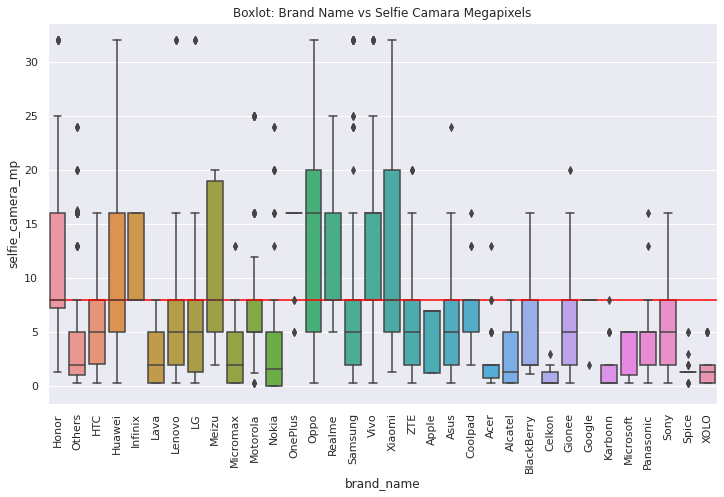

In [20]:
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
plt.axhline(y=8, xmin=0, xmax=1, c= 'red')
sns.boxplot(data= df, y= 'selfie_camera_mp', x= 'brand_name')
plt.title("Boxlot: Brand Name vs Selfie Camara Megapixels");

* The red line cuts in value `selfie_camera` = 8 mp.

* We can observe that Xolo, Spice, Microsoft, and Celkon only offer gadgets below  8mp.
* Brands such as One Plus have only 3 different values of mp to offer: 5 mp, 8 mp, and 16 mp being the median.
* Infinix offers gadgets ranging 8 mp as the minimum and 16 mp as the maximum.
* Huawei, Oppo, and Xiaomi are the brands with the widest ranges of mp in their products going from a minimum of 1 mp to 38 mp. However, while for Huawei and Xiaomi 8 mp is their median, Oppo's median is 16 mp.

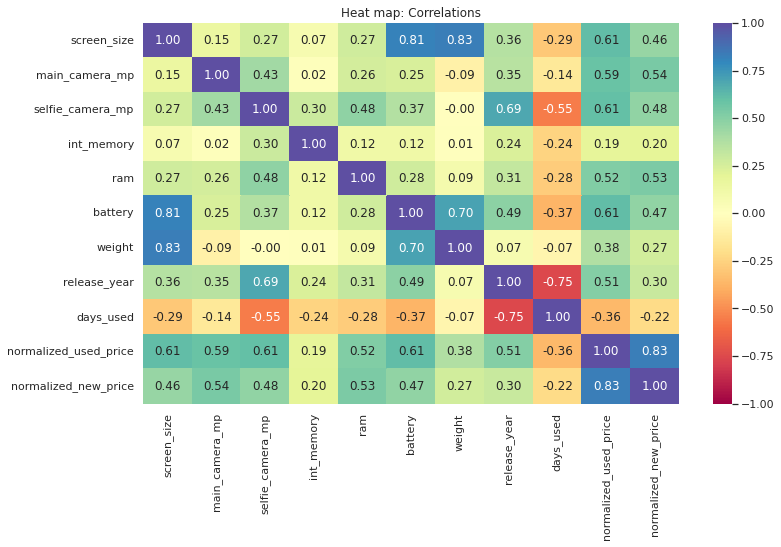

In [21]:
# Which attributes are highly correlated with the normalized price of a used device?
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Heat map: Correlations");
plt.show()

* `normalized_new_price` has the highest positive correlation with 0.83, which was expected.
* `battery`, `selfie_camera_mp`and `screen size`have the second highest positive correlation with 0.61.
* `main_camera_mp`comes in third place with a positive correlation off 0.59, `ram`in forth with 0.52, and `released_year`in fifth with 0.51.
* The only variable presenting a negative correlation is `days_used`with -0.36. 

## Data Preprocessing

#### Missing value treatment

In [22]:
# Checking duplicated observations
df.duplicated().sum()

0

In [23]:
df.isnull().sum()   

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [24]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182397
selfie_camera_mp,2,0.057904
int_memory,4,0.115808
ram,4,0.115808
battery,6,0.173712
weight,7,0.202664


* There are 6 variables with missing values, from which `main_camera_mp`have the biggest amount of naan which represent 5.18% of the observations. 

In [25]:
df.loc[df['main_camera_mp'].isnull()==True]  # Double checking how missing values were represented (NaN or ? etc.)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


In [26]:
df.loc[df['selfie_camera_mp'].isnull()==True]  

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


In [27]:
df.loc[df['battery'].isnull()==True]  

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905


In [28]:
df.loc[df['int_memory'].isnull()==True]  

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


In [29]:
df.loc[df['weight'].isnull()==True]  

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,4.184642,4.785406


<Figure size 720x360 with 0 Axes>

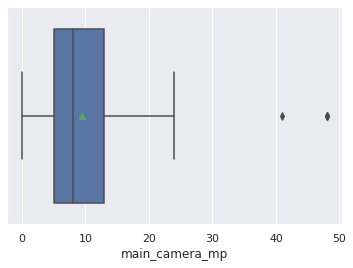

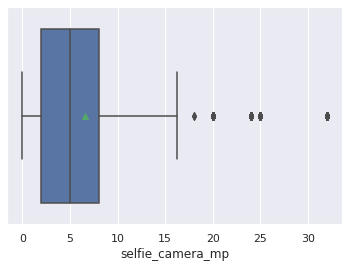

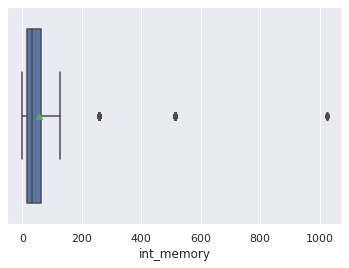

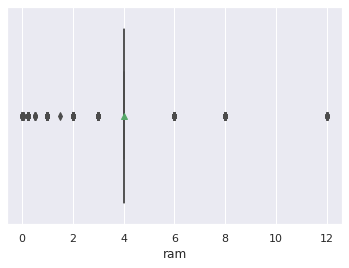

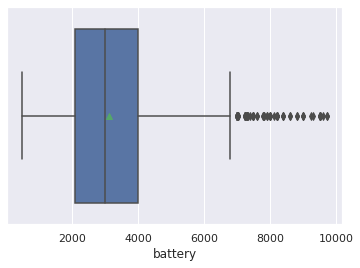

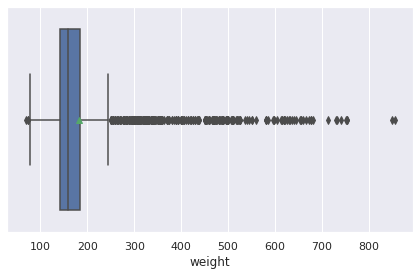

In [30]:
# Checking through boxplots if these variables with missing values have outliers to understand how to treat them
num_col_out = ['main_camera_mp', 'selfie_camera_mp','int_memory','ram','battery','weight']

plt.figure(figsize=(10,5))
for i, col in enumerate(num_col_out):
    ax =  plt.subplots(1)
    sns.boxplot(data=df, x=col, showmeans= True)
plt.tight_layout()

All the variables with "missing values" have outliers, therefore, the best way to treat them is by substituting with their median. 

In [31]:
df = df.replace("NaN", np.nan)

In [32]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(value = df.groupby(['release_year','brand_name'])['main_camera_mp'].transform('median'))

In [33]:
df['int_memory'] = df['int_memory'].fillna(value = df['int_memory'].median())
df['ram'] = df['ram'].fillna(value = df['ram'].median())
df['battery'] = df['battery'].fillna(value = df['battery'].median())


In [34]:
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(value = df.groupby(['main_camera_mp','brand_name'])['selfie_camera_mp'].transform('median'))

In [35]:
df['weight'] = df['weight'].fillna(value = df.groupby(['battery'])['weight'].transform('median'))

In [36]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182397


In [37]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(value = df['main_camera_mp'].median())

In [38]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage


In [39]:
list(df.columns)

['brand_name',
 'os',
 'screen_size',
 '4g',
 '5g',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

#### Treating outliers 

<Figure size 720x360 with 0 Axes>

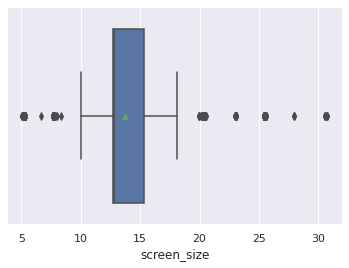

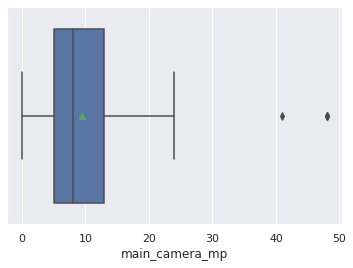

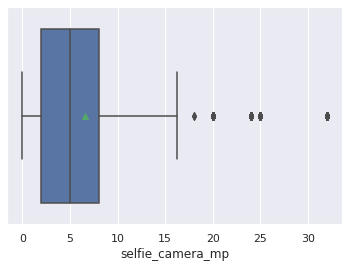

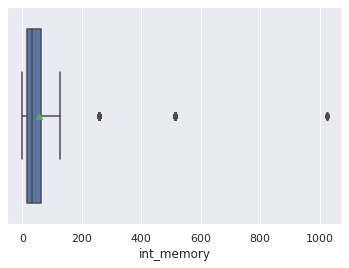

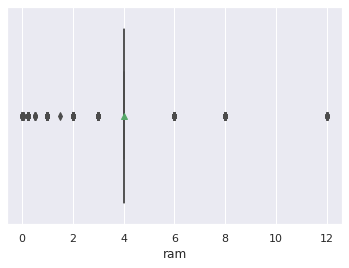

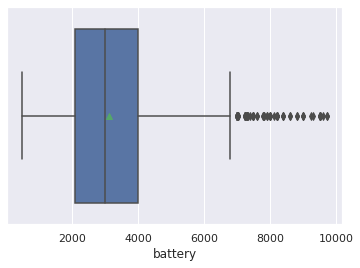

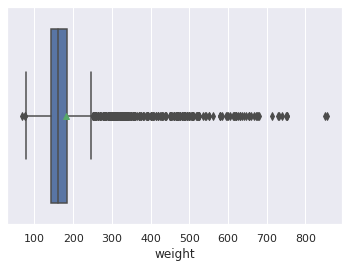

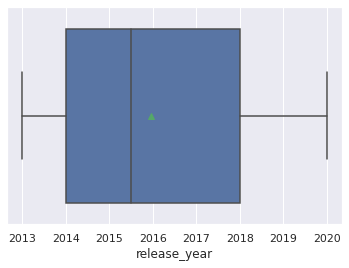

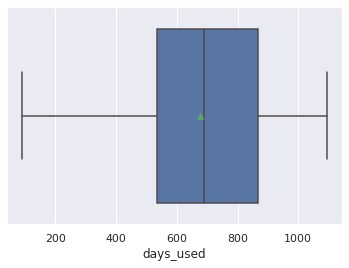

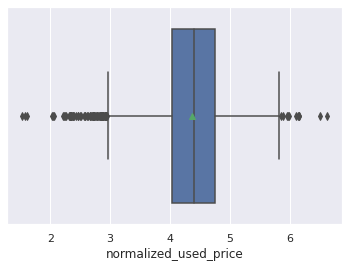

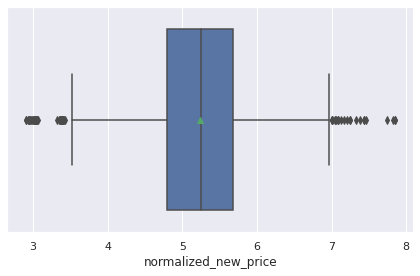

In [40]:
# Making boxplots with ALL variables to identify which variables 
# has outliers and if those values make sense
numerical = [
 'screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

plt.figure(figsize=(10,5))
for i, col in enumerate(numerical):
    ax =  plt.subplots(1)
    sns.boxplot(data=df, x=col, showmeans= True)
plt.tight_layout();


* `Screen size`: The outliers in this column can be considered as genuine values because minimum values for outliers might correspond to basic cellphones such as flip-phones or very economical phones, and high values correspond to tablets. These numbers are realistic and will not be considered outliers.
* `Main camera mp`: The outliers in this column can be considered genuine since the maximum value of 48 pixels is realistic and especially for models released in 2019. 
* `Selfie camera mp`: The outliers in this column can be considered genuine since the maximum value of 32 pixels is realistic and especially for models released in 2019 and 2020. Nowadays there are selfie cameras with 40-44 mp.
* `Interior memory`: The outliers in this column can be considered genuine because there are tablets and cell phones with 1 TB capacity (1000 GB). Memory in cell phones can also be expanded.
* `RAM`: The outliers in this column can be considered genuine since cell phones and tablets do have 12 GB RAM capacity for the maximum values and the minimum values can belong to basic cheap phones or old flip phones. 
* `Battery`: The outliers in this column can be considered genuine because these high values may correspond to tablets since they usually utilize mAh > 8000 and some are expendable. 
* `Weigh`: The outliers in this column can be considered genuine because these outliers might correspond to tablets which are heavier than cell phones. The highest values correspond in their majority to tablets with high battery mAh and others that don't, might corresponds to older phone models that probably were built with heavier materials (metals) or tablets in the same situation. 
* `Normalized used price` and `normalized new price`: Outliers will be treated as genuine values.

#### Feature engineering

In [41]:
# Converting categorical values yes/no to numerical values to
# function as dummies yes(1)/no(0)
df["4g"] = df["4g"].replace({"yes": 1, 'no': 0})
df["5g"] = df["5g"].replace({"yes": 1, 'no': 0})

In [42]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   int64  
 4   5g                     3454 non-null   int64  
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

## EDA

- It is a good idea to explore the data once again after manipulating it.

#### Univariete analisys

<Figure size 720x360 with 0 Axes>

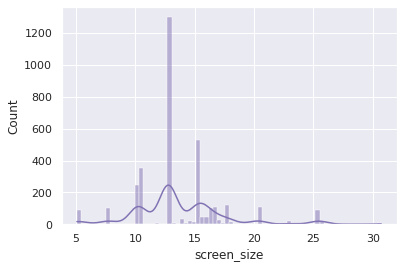

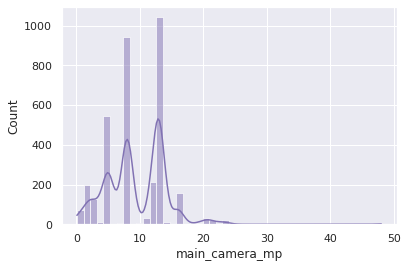

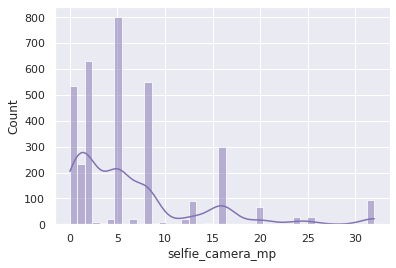

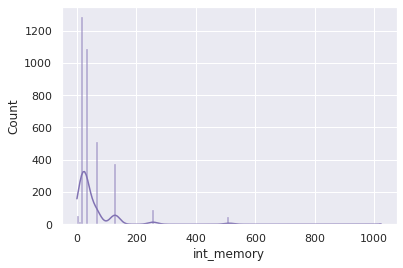

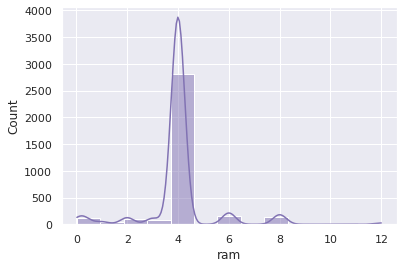

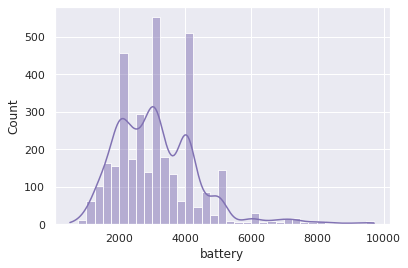

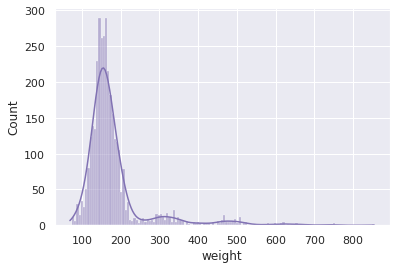

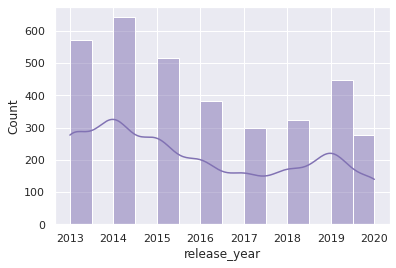

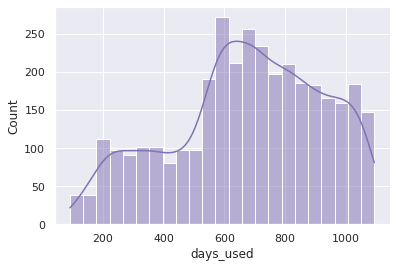

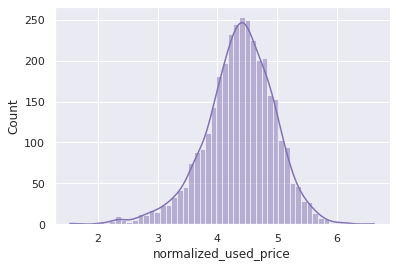

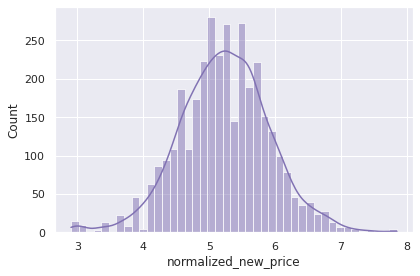

In [44]:
numerical = [
 'screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

plt.figure(figsize=(10,5))
for i, col in enumerate(numerical):
    ax =  plt.subplots(1)
    sns.histplot(data=df, x=col, kde = True, color='m')
plt.tight_layout();

* `normalized_used_price`and `normalized_new_price`as expected do have a normal distribution.
* `weight`has a normal skewed to the right distribution.

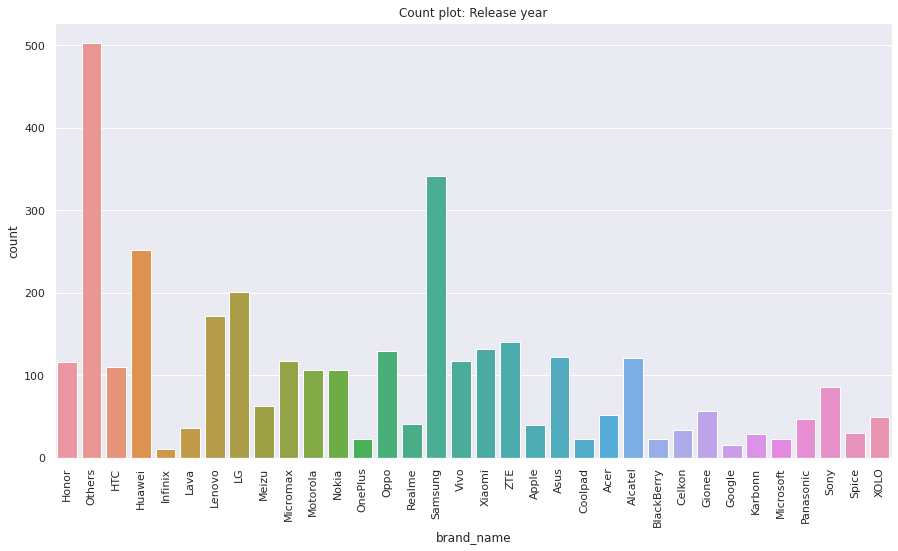

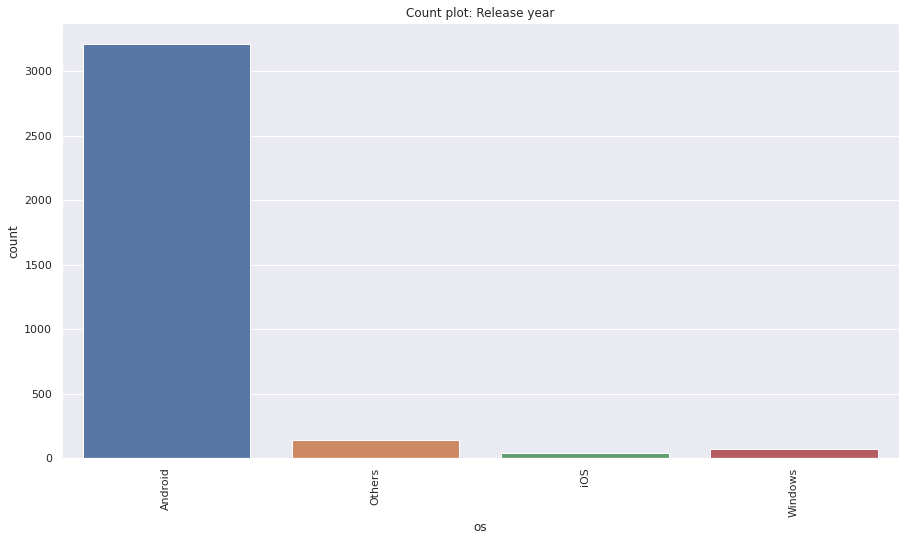

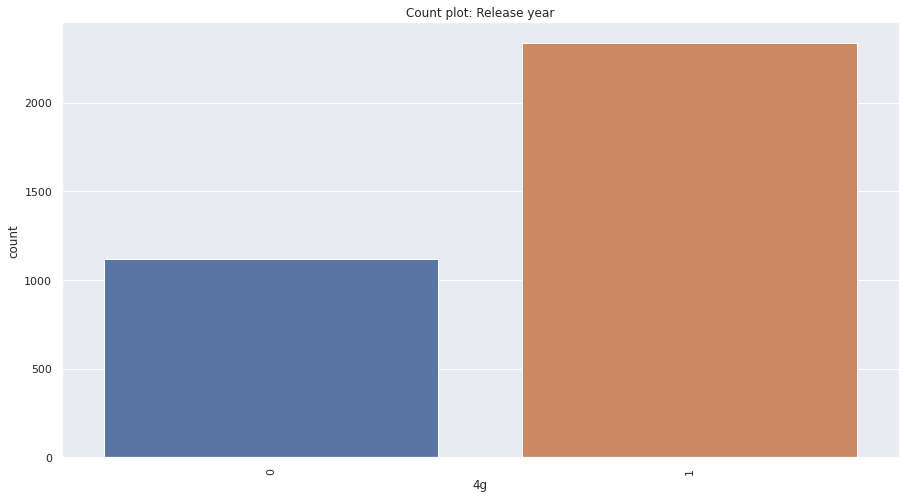

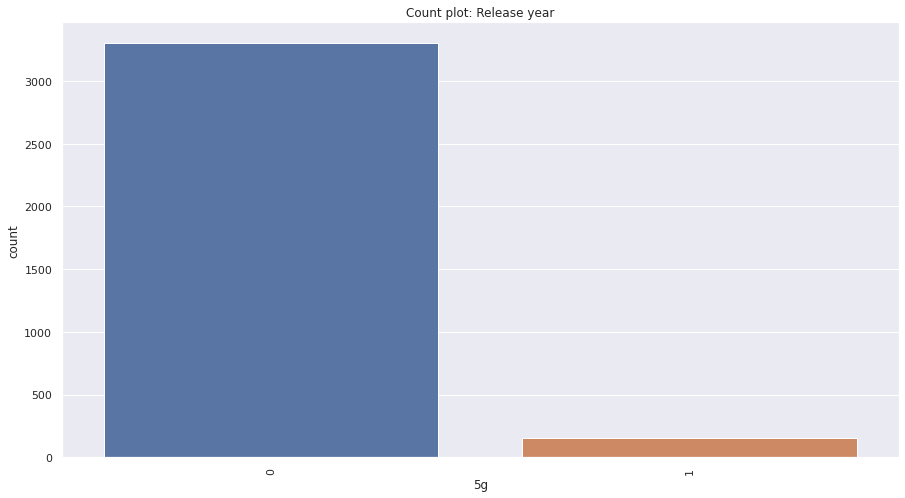

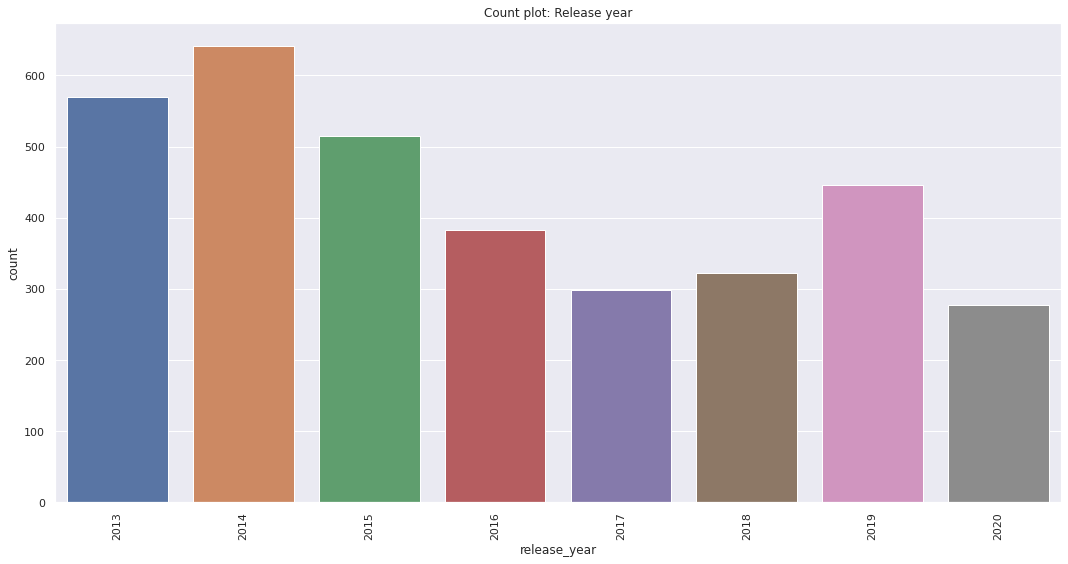

In [45]:
objects = ['brand_name', 'os', '4g','5g','release_year']

for i, col in enumerate(objects):
    plt.figure(figsize=(15,8))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.title("Count plot: Release year");
plt.tight_layout();

* The most frequent brand are "Other", Samsung, Huawei, and LG, in this order. 
* Android is the predominant os system with more than 3200 gadgets with this os. 
* There are more gadgets with 4g than without
* To not have 5g is more frequent than having
* The majority of the gadgets are from year 2014 and the minority belongs to year 2020.



#### Bivariate analysis

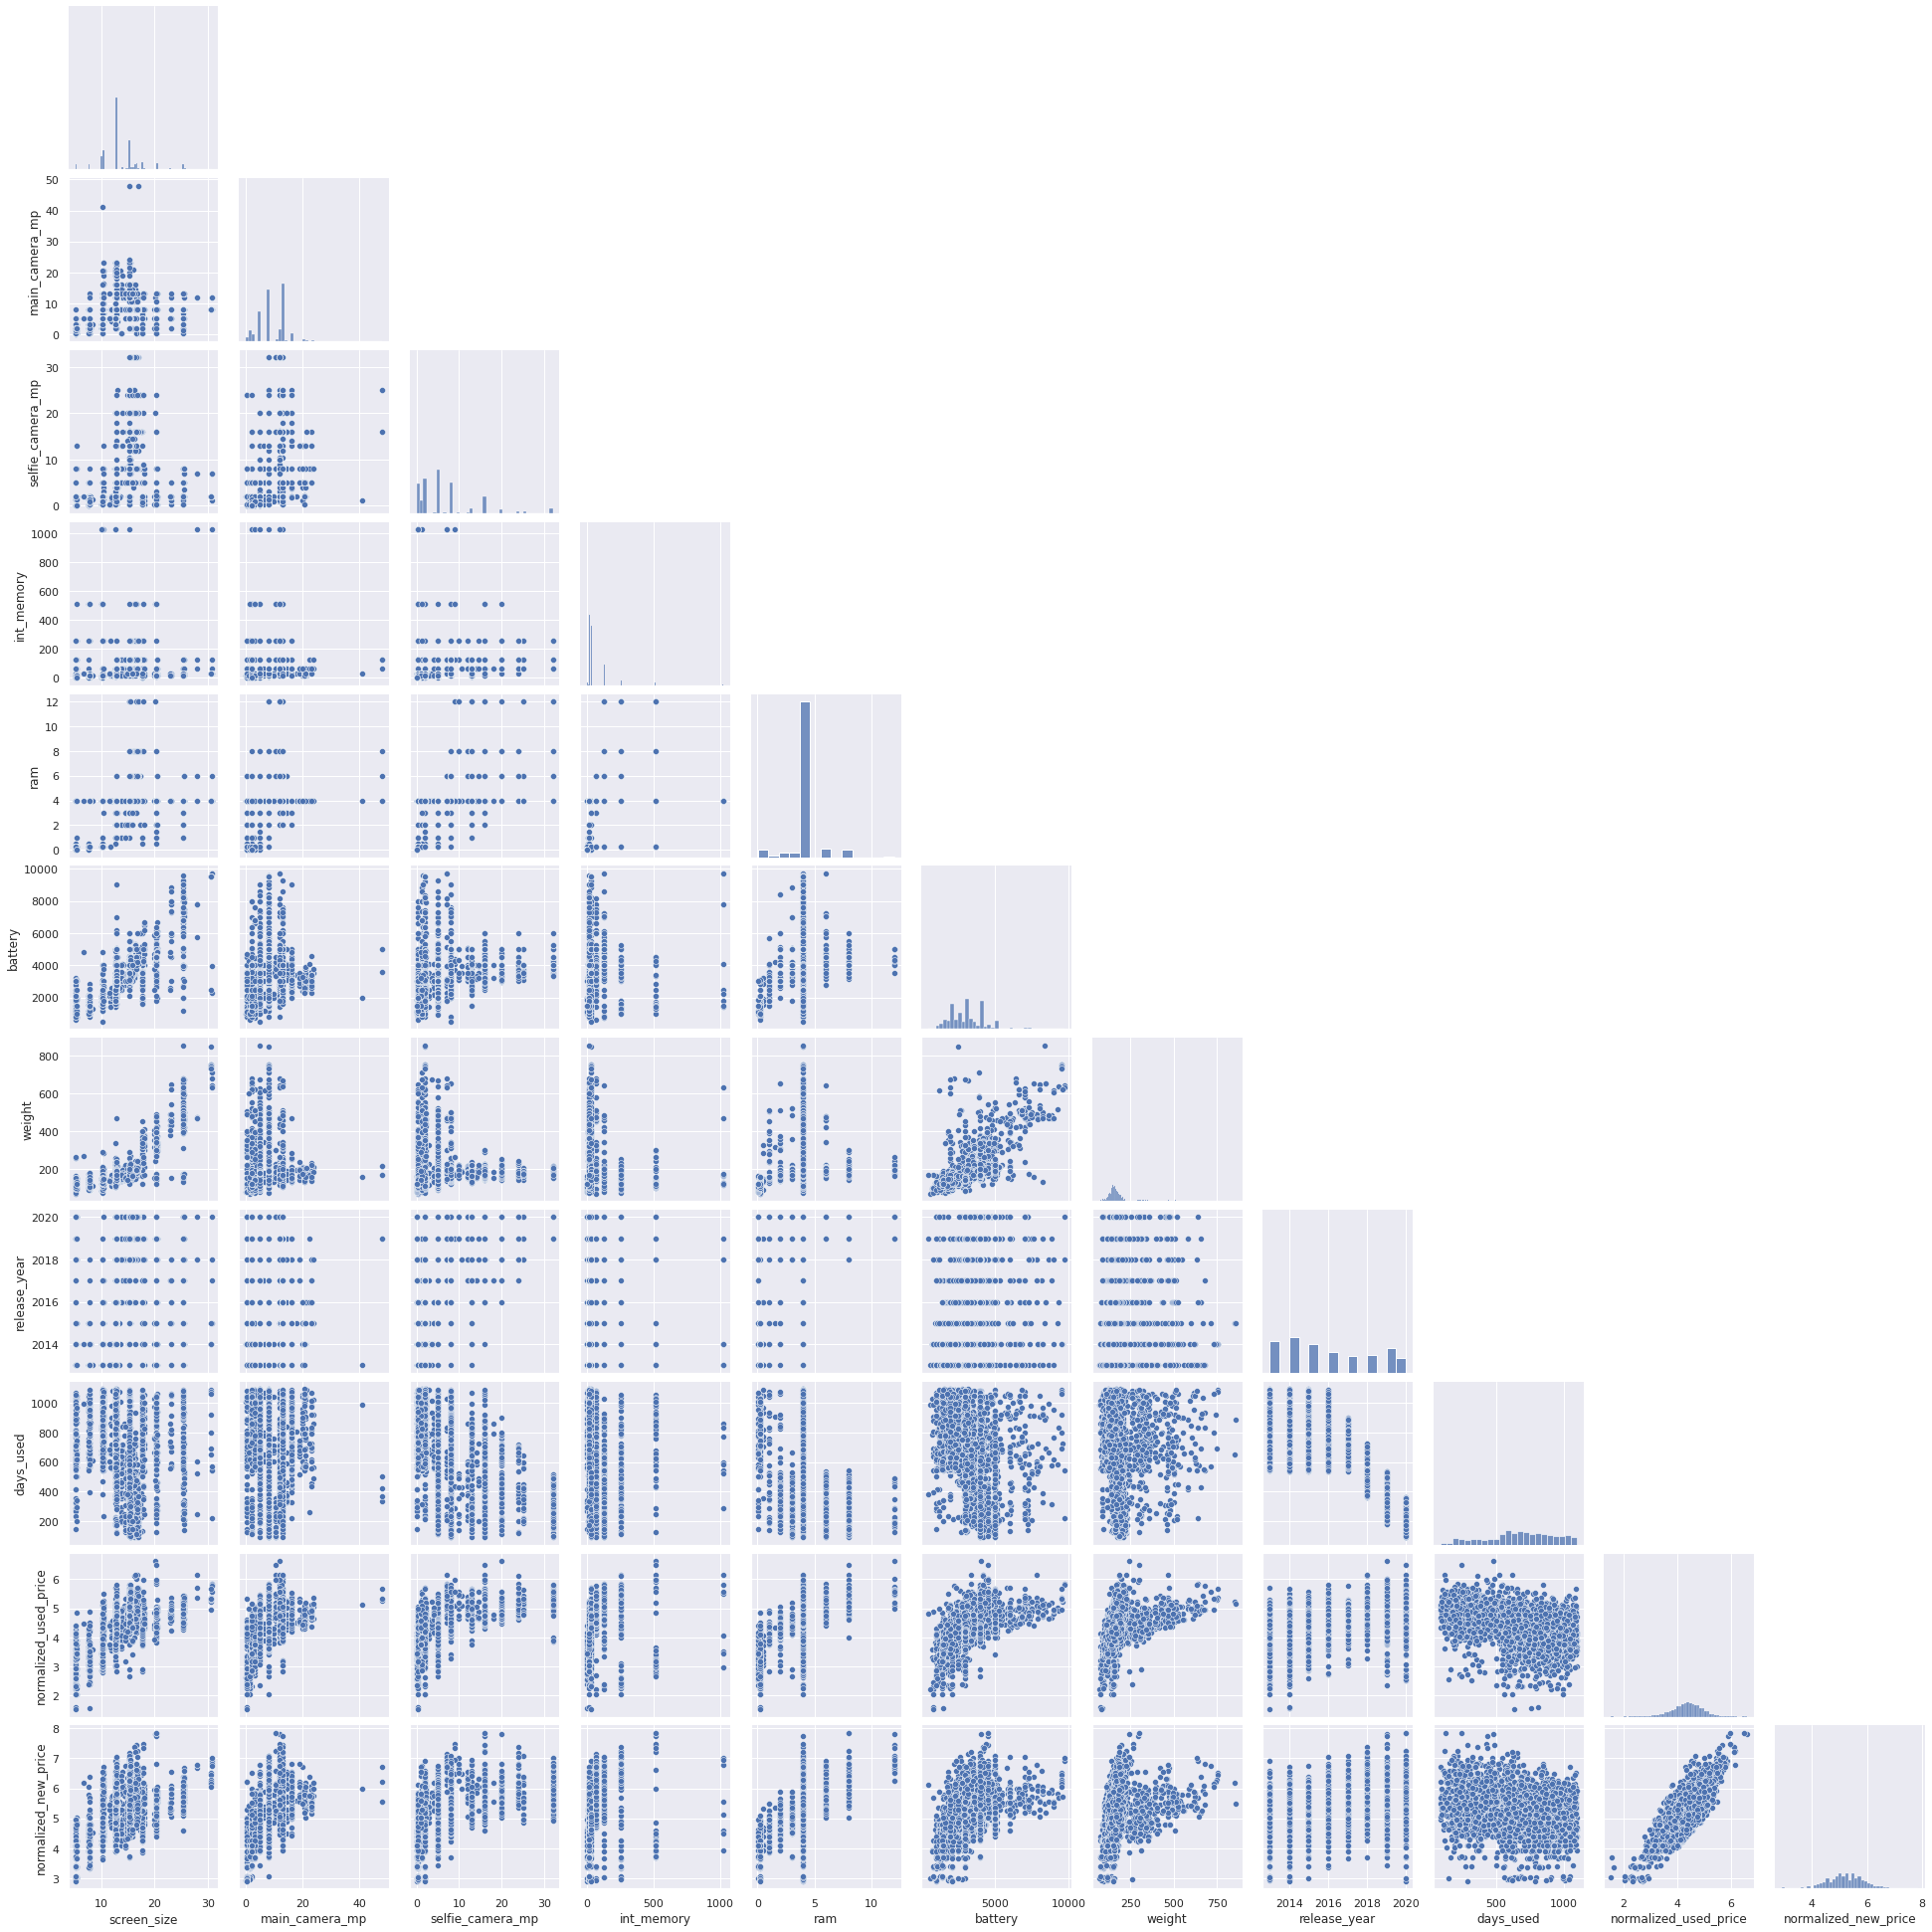

In [46]:
sns.pairplot(data=df, vars=numerical, corner=True);

* The relationship between`normalized_used_price` and other attributes is not really linear, however, the plots also indicate that linearity would still be capture in some pattern such as `screen_size`, `main_camera_mp` and `selfie_camera_mp`
* Atributes that do show a stronger linear pattern are `battery`and `weight` and `days_used`

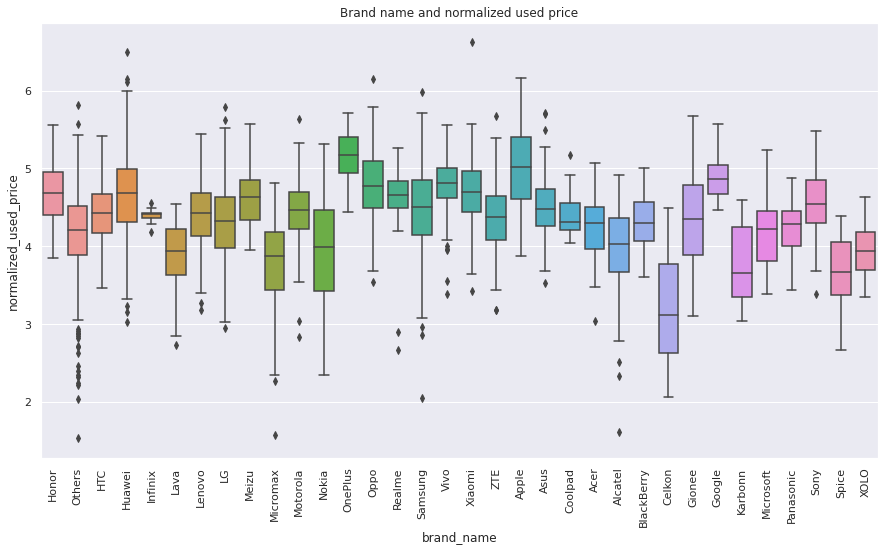

In [47]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = df, x= 'brand_name', y = 'normalized_used_price')
plt.title("Brand name and normalized used price") ;

+ Cheapest prices from used divices belong to brands Others, Micromax, and Alcatel.
* The most expensive divices belong to brands Huawei and Xiaomi.
* OnePlus has the highest median price with > 5, followed by Apple with a median price of 5. 
* Brands Honor, Meizu, Nokia, OnePlus, Apple, BlackBerry, Celkon, Gionee, Google, Karbonn, Microsoft, Panasonic, Spice, and Xolo do not have outliers.

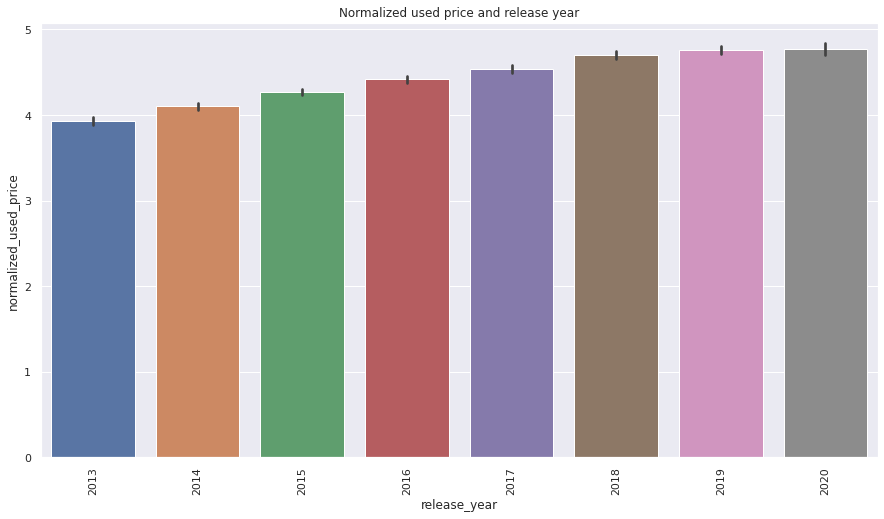

In [48]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data = df, x= 'release_year', y = 'normalized_used_price')
plt.title("Normalized used price and release year") ;

Through the years' gadget prices have risen. 

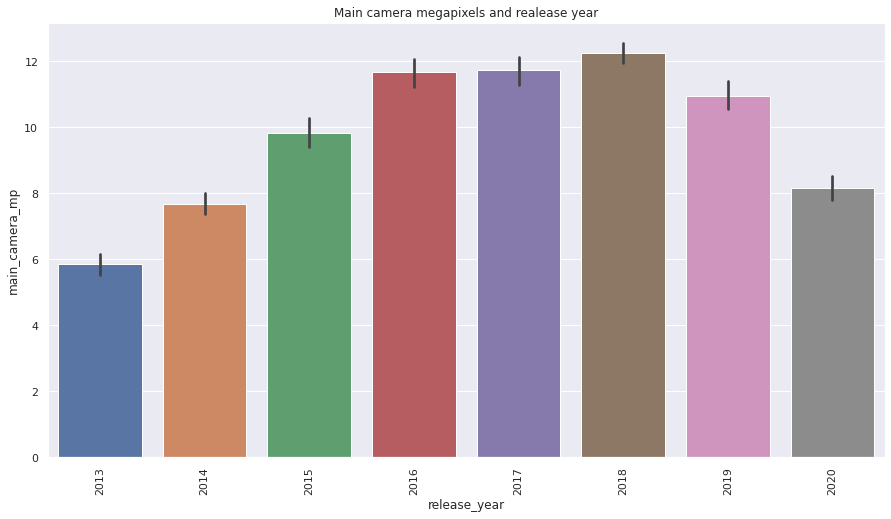

In [49]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(data = df, x= 'release_year', y = 'main_camera_mp')
plt.title("Main camera megapixels and realease year") ;

* The majority of observations belong to 2018, followed by 2017 and 2016.

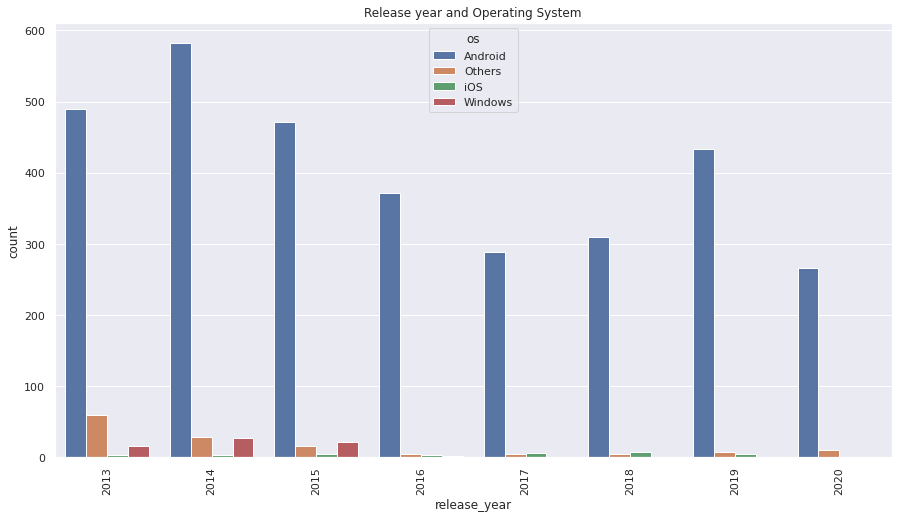

In [50]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(data = df, x= 'release_year', hue = 'os')
plt.title("Release year and Operating System") ;

* Android is the predominant os throughout the years. 
* Windows os was present from 2013 to 2015 and desappeared from 2016 and on. 
* iOS os is the least used os throughout the years, until 2020 that it disappeared. 

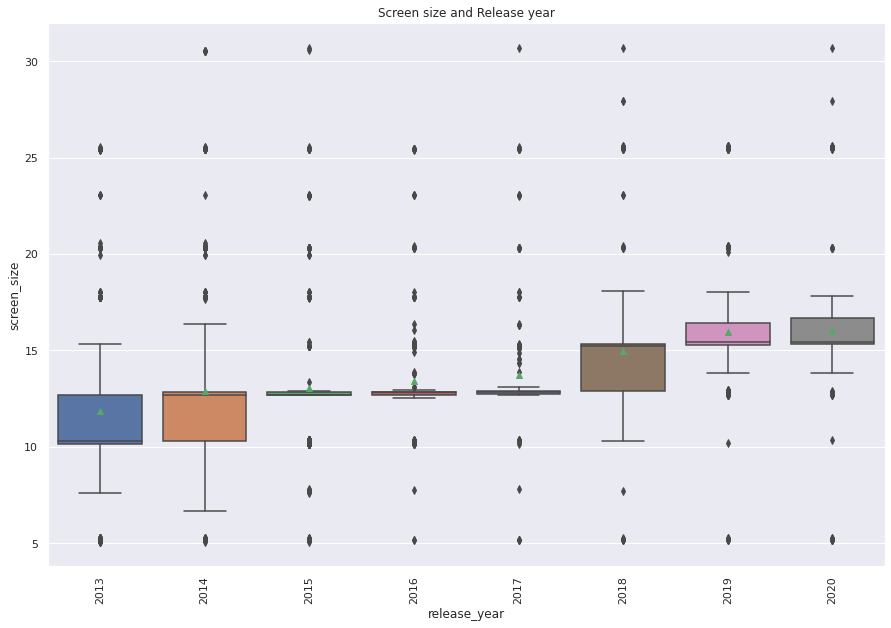

In [51]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(data = df, x= 'release_year', y = 'screen_size', showmeans = True)
plt.title("Screen size and Release year") ;

* There is a clear pattern that shows that screen size became bigger through the years.
* From 2014- 2017 the median screen size was 12.5 cm.

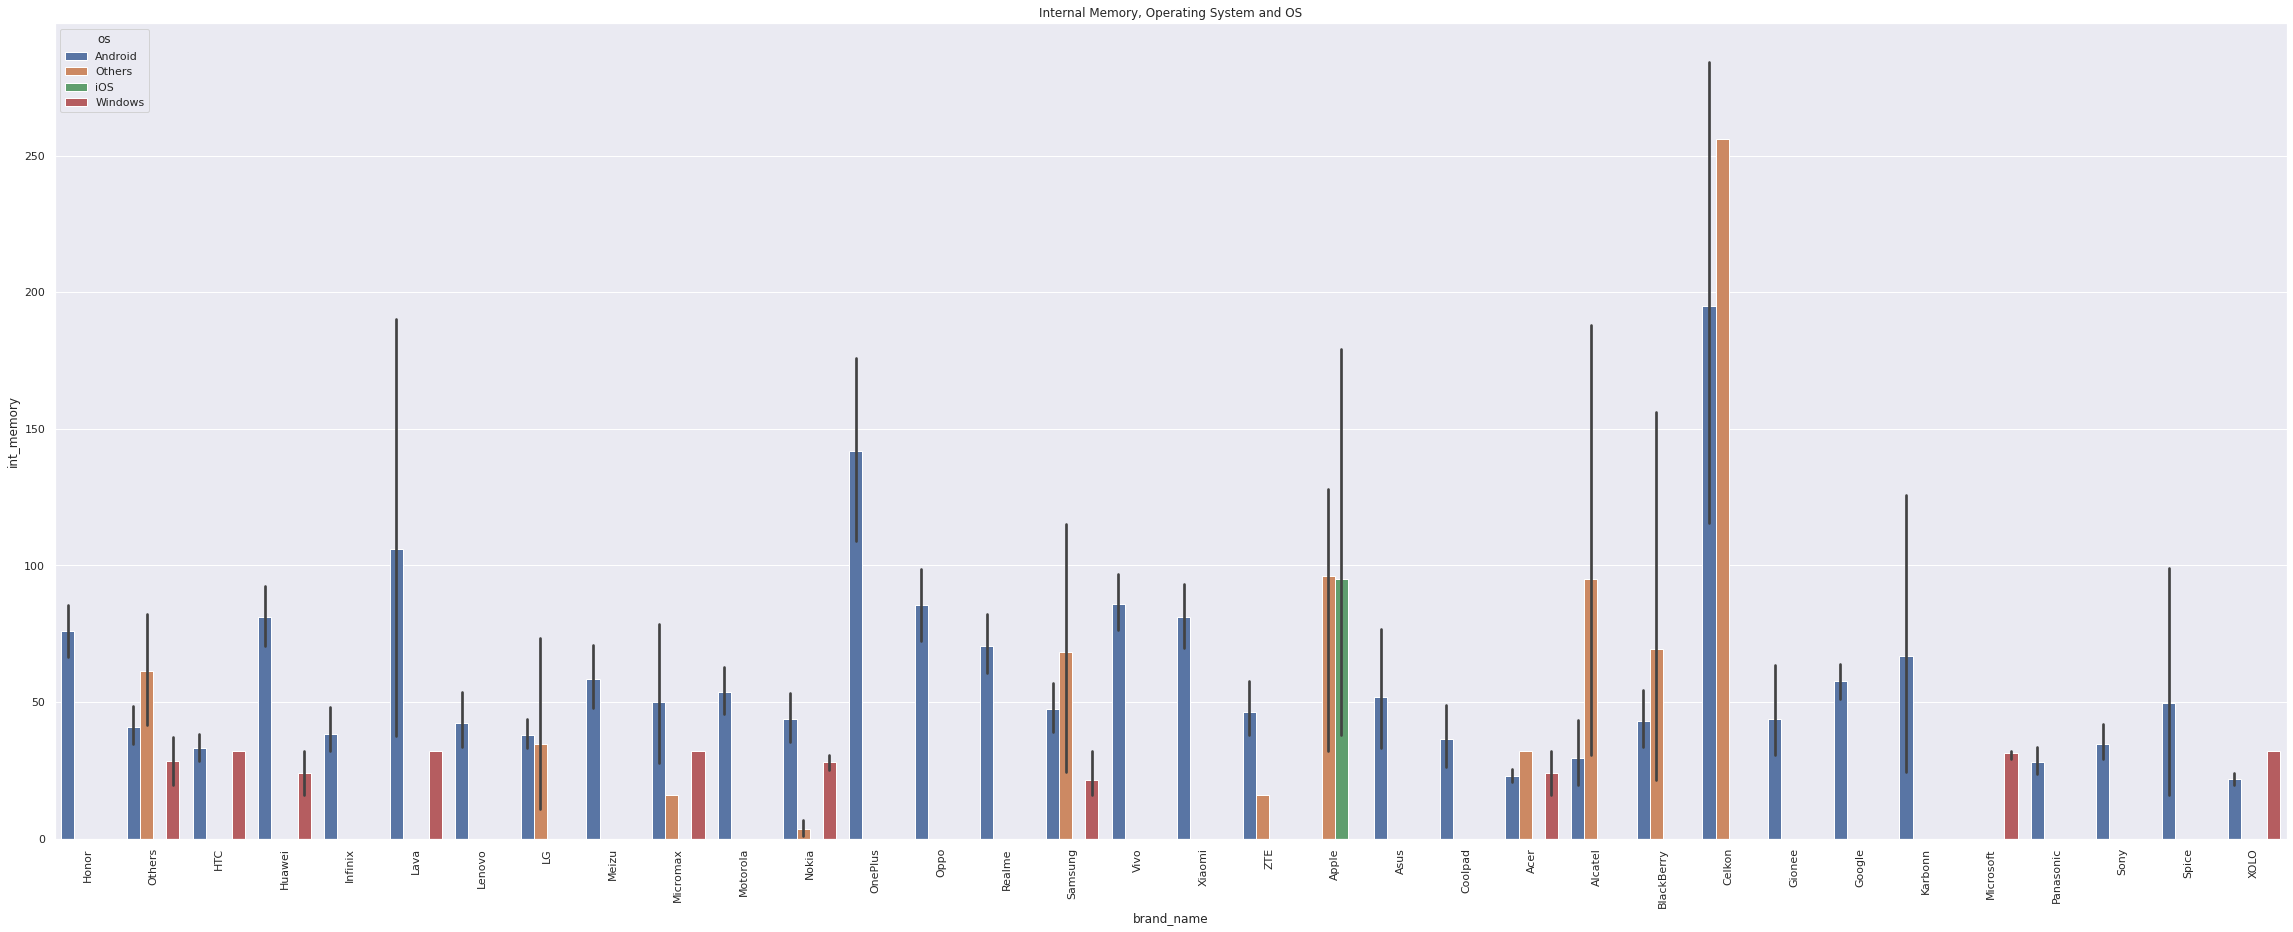

In [52]:
plt.figure(figsize=(40,15))
plt.xticks(rotation=90)
sns.barplot(data = df, y= 'int_memory', x = 'brand_name', hue='os')
plt.title("Internal Memory, Operating System and OS") ;

* The predominant operating system is Android for almost all brands.
* Cellkon is the brand with the highest internal memory for "others" and "Android" os. 
* As expected Microsoft brand is run by Windows os.

* It makes no sense that Apple equipment runs with "other" os. I'm substituting "other" with ios for all those observations.

In [53]:
df.loc[df.brand_name == 'Apple', 'os'] = "iOS"

## Model Building - Linear Regression

#### Preparing data for modeling


In [54]:
# Converting "release_year" into categorical data to make it a dummie.
df['release_year'].astype('category')

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
3449    2019
3450    2018
3451    2020
3452    2020
3453    2020
Name: release_year, Length: 3454, dtype: category
Categories (8, int64): [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [55]:
df['release_year'].unique()

array([2020, 2019, 2013, 2014, 2016, 2018, 2015, 2017])

In [56]:
df['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [57]:
# Creating dummies
df = pd.get_dummies(df, columns=['release_year','os'], drop_first=True)

In [58]:
df = df.drop(["brand_name"], axis=1)

In [59]:
# We want to predict normalized_used_price

X = df.drop(["normalized_used_price"], axis=1)
y = df["normalized_used_price"]

print(X.head())
print(y.head())

X = sm.add_constant(X)

   screen_size  4g  5g  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0        14.50   1   0            13.0               5.0        64.0  3.0   
1        17.30   1   1            13.0              16.0       128.0  8.0   
2        16.69   1   1            13.0               8.0       128.0  8.0   
3        25.50   1   1            13.0               8.0        64.0  6.0   
4        15.32   1   0            13.0               8.0        64.0  3.0   

   battery  weight  days_used  ...  release_year_2014  release_year_2015  \
0   3020.0   146.0        127  ...                  0                  0   
1   4300.0   213.0        325  ...                  0                  0   
2   4200.0   213.0        162  ...                  0                  0   
3   7250.0   480.0        345  ...                  0                  0   
4   5000.0   185.0        293  ...                  0                  0   

   release_year_2016  release_year_2017  release_year_2018  release_year_2019  \

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 3454 non-null   float64
 1   screen_size           3454 non-null   float64
 2   4g                    3454 non-null   int64  
 3   5g                    3454 non-null   int64  
 4   main_camera_mp        3454 non-null   float64
 5   selfie_camera_mp      3454 non-null   float64
 6   int_memory            3454 non-null   float64
 7   ram                   3454 non-null   float64
 8   battery               3454 non-null   float64
 9   weight                3454 non-null   float64
 10  days_used             3454 non-null   int64  
 11  normalized_new_price  3454 non-null   float64
 12  release_year_2014     3454 non-null   uint8  
 13  release_year_2015     3454 non-null   uint8  
 14  release_year_2016     3454 non-null   uint8  
 15  release_year_2017    

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
# Observing how my data was divided 30/70
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [63]:
# First ols model 
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()
print(olsres.summary()) 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     611.4
Date:                   Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                           15:58:19   Log-Likelihood:                 107.56
No. Observations:                   2417   AIC:                            -171.1
Df Residuals:                       2395   BIC:                            -43.73
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [64]:
# Checking Multicollinearity - ¿can I trust the p_values of the parameters?


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                   158.085521
screen_size               7.514224
4g                        2.448998
5g                        2.116371
main_camera_mp            2.034632
selfie_camera_mp          2.673418
int_memory                1.266749
ram                       2.136049
battery                   3.878031
weight                    6.231926
days_used                 3.207584
normalized_new_price      2.744808
release_year_2014         1.880399
release_year_2015         2.123284
release_year_2016         2.230548
release_year_2017         2.162877
release_year_2018         2.706545
release_year_2019         4.666512
release_year_2020         4.323312
os_Others                 1.530842
os_Windows                1.031709
os_iOS                    1.106158
dtype: float64



* The greatest VIF values are `screen_size`and `weight` (VIF > 5). We will run a sensibility test to see how dropping these features affect R2

In [65]:
x_train1 = x_train.drop(["screen_size"], axis=1)
olsmod1 = sm.OLS(y_train, x_train1)
olsres1 = olsmod1.fit()
print(
    "R-squared:",
    np.round(olsres1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres1.rsquared_adj, 3),
)

R-squared: 0.839 
Adjusted R-squared: 0.837


* There is a decrease of 0.004. 

In [66]:
x_train2 = x_train.drop(["weight"], axis=1)
olsmod2 = sm.OLS(y_train, x_train2)
olsres2 = olsmod2.fit()
print(
    "R-squared:",
    np.round(olsres2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres2.rsquared_adj, 3),
)

R-squared: 0.84 
Adjusted R-squared: 0.838


* There is a decrease of 0.003.

* Eliminating `weight` has less negative impact in R2. 

In [67]:
x_train = x_train.drop(["weight"], axis=1) # Dropping weight

In [68]:
vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   150.897098
screen_size               3.473540
4g                        2.422004
5g                        2.116305
main_camera_mp            1.949624
selfie_camera_mp          2.638797
int_memory                1.266527
ram                       2.133283
battery                   3.514503
days_used                 3.199529
normalized_new_price      2.737868
release_year_2014         1.855155
release_year_2015         2.090301
release_year_2016         2.197040
release_year_2017         2.143805
release_year_2018         2.607783
release_year_2019         4.467101
release_year_2020         4.177342
os_Others                 1.406507
os_Windows                1.030458
os_iOS                    1.097276
dtype: float64



Now that I've dropped variables with multicollinearity I run a new model and check the p-values. I can trust now my p_values.

In [69]:
olsmod3 = sm.OLS(y_train, x_train)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     628.0
Date:                   Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                           15:58:19   Log-Likelihood:                 84.901
No. Observations:                   2417   AIC:                            -127.8
Df Residuals:                       2396   BIC:                            -6.206
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

* There are many p_values > .05 there for I will drop them since they are not significant in predicting normalized_use_price

In [70]:
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # variable to store name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'release_year_2015', 'release_year_2016', 'release_year_2017', 'release_year_2018', 'release_year_2019', 'release_year_2020']


In [71]:
# Generating x_train and x_test with the features that ended up being significant in the model
x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [72]:
olsmod4 = sm.OLS(y_train, x_train).fit()
print(olsmod4.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1141.
Date:                   Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                           15:58:20   Log-Likelihood:                 79.909
No. Observations:                   2417   AIC:                            -135.8
Df Residuals:                       2405   BIC:                            -66.34
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

* There was only a loss of 0.42% for R2 in relation to the first model (olsmod - R2 =  0.843 ) and the last model (olsmod4 - R2 = 0.839). 
* For the last model (olsmod4) there's no multicollinearity and all p_values are significant. 

## Model Performance Check

In [73]:
# Get the predictions on test set
y_pred_test = olsmod4.predict(x_test)
y_pred_test

866     4.257350
957     3.298140
280     4.177431
2150    4.740931
93      4.525099
          ...   
2191    4.365962
3217    4.038358
885     2.660136
2991    3.983316
1071    3.869365
Length: 1037, dtype: float64

In [74]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    mape = np.mean(np.abs((targets - predictions) / targets)) * 100
    return mape

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = olsmod4.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [75]:
# Model performance for train sample
olsmodel_train_perf = model_performance_regression(olsmod4, x_train, y_train)
olsmodel_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234102,0.183768,0.839142,0.838339,4.40524


In [76]:
# Model performance for test sample
olsmodel_test_perf = model_performance_regression(olsmod4, x_test, y_test)
olsmodel_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239468,0.184691,0.841008,0.839145,4.50353


In [77]:
# % difference between model performances
percentage_dif = ((olsmodel_test_perf/olsmodel_train_perf)-1)*100
percentage_dif

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.29246,0.502364,0.222395,0.096139,2.231188


We can rule out overfitting and underfitting because comparing both models the changes one each indicador are < 5%.

* RMSE_trian < RMSE_test (There is a slight decrease of 2.29% from RMSE_train to RMSE_test)
* R2_train < R2_test (There is a slight decrease of 0.222% from R2_train to R2_test)
* MAPE_train < MAPE_test (There is a slight increase of 2.23% from MAPE_train to MAPE_test)

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [78]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Y_hat Values"] = olsmod4.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmod4.resid.values  # residuals

df_pred.head()

,Actual Values,Y_hat Values,Residuals
0,4.087488,3.848999,0.238488
1,4.448399,4.610853,-0.162454
2,4.315353,4.338619,-0.023267
3,4.282068,4.273390,0.008678
4,4.456438,4.472694,-0.016256


#### Linearity test - Plot residues with fitted values


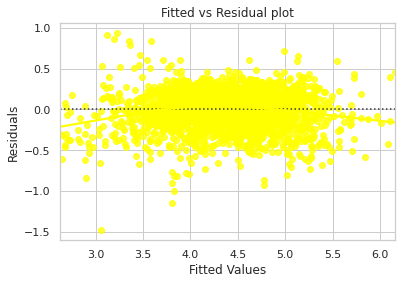

In [79]:
sns.set_style("whitegrid")
sns.residplot(data=df_pred, x="Y_hat Values", y="Residuals", color="yellow", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


We observe no pattern between fitted values and residuals hence we can conclude that the model is linear

#### Normality test - are errors have a normal distribution?

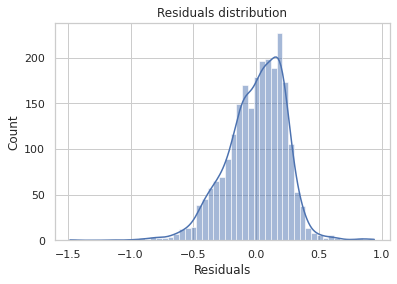

In [80]:
# Method 1: Histogram -residuals

sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Residuals distribution")
plt.show()



Residuals seem to have a normal distribution.

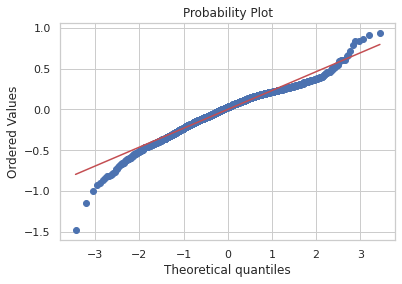

In [81]:
# Method 2: QQ-plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

End tails from the QQ-Plot do not lie on the straight line. We will perform Shapiro test to make the final conclusion.

In [82]:
# Method 3: Shapiro

w, p_value = stats.shapiro(df_pred["Residuals"])
print('The p_value is:', p_value)

The p_value is: 4.744440210036724e-21


* Since p-value < 0.05 we can say that Ho is rejected and residuals do not have a normal distribution.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

#### Homoscedasticity test - the variance of residuals are symestrical across the regression line?

In [83]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [84]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', 1.0655458277417953), ('p-value', 0.13616410301639403)]

Since p-value > 0.05 we can say that the residuals are homoscedastic.

## Final Model

In [85]:
print(olsmod4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1141.
Date:                   Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                           15:58:22   Log-Likelihood:                 79.909
No. Observations:                   2417   AIC:                            -135.8
Df Residuals:                       2405   BIC:                            -66.34
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [86]:
# Let us write the equation of linear regression
Equation = "Normalized used price ="
print(Equation, end=" ")
for i in range(len(x_train.columns)):
    if i == 0:
        print(olsmod4.params[i], "+", end=" ")
    elif i != len(x_train.columns) - 1:
        print(
            "(",
            olsmod4.params[i],
            ")*(",
            x_train.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", olsmod4.params[i], ")*(", x_train.columns[i], ")")

Normalized used price = 1.1071499346454536 + ( 0.043185244774187226 )*( screen_size ) + ( 0.018621499882541123 )*( main_camera_mp ) + ( 0.013753395614541315 )*( selfie_camera_mp ) + ( 0.0158465358318499 )*( ram ) + ( 0.4338825619241468 )*( normalized_new_price ) + ( 0.0795326727752015 )*( release_year_2015 ) + ( 0.10903286591427523 )*( release_year_2016 ) + ( 0.10734785218494515 )*( release_year_2017 ) + ( 0.08524052551541354 )*( release_year_2018 ) + ( 0.0995023926311649 )*( release_year_2019 ) + ( 0.16801260636432022 )*( release_year_2020 )


#### Final notes:
The model was initially run with all variables, including `brand_name` as dummies, however, during VIF analysis and p_value analysis, 82% of the `brand_names` dummies were thrown out of the model, therefore, a second model without this feature was run and ended up with better results for R2 MAPE and RMSE when performance check was done. I sacrificed 0.12% of the final R2 of the model that included `brand_names` to get a new and better model that did not include `brand_names`, that had fewer variables, stronger p_values (0.000), and better performance. 


## Actionable Insights and Recommendations 

#### Conclusions:

* RMSE and R2 on the train and test sets are comparable, hence we can say that we are not suffering from underfitting
* We can conclude that the model "olsmod4" is good for prediction as well as for inference purposes.
* R2 of the model is 0.839 which shows the model is able to explain 83.9% of the variance in the data. 
* MAPE values of the model show the model is able to predict with a 4.5% error which is pretty low. 

#### Insights:

* Any cellphone has a base price of 1.1071, which means that when all variable values are 0 then the minimum price of any the gadgets is 1.1071. 
* All other variables remain constant, for every cm for `screen_size` the value of a gadget increases by 0.0432. 
* All other variables remain constant, for every megapixel for `main_camera_mp`the value of the gadget increases in 0.0186.
* All other variables remain constant, for every megapixel for `selfie_camera_mp`the value of the gadget increases in 0.0138.
* All other variables remain constant, for every megapixel for `ram` the value of the gadget increases by 0.0158.
* All other variables remain constant, for every megapixel for `normalized_new_price`the value of the gadget increases in 0.4339.
* All other variables remain constant, if the phone `release_year`is 2015, then the value increases by 0.0795.
* All other variables remain constant, if the phone `release_year`is 2016, then the value increases by 0.1090.
* All other variables remain constant, if the phone `release_year`is 2017, then the value increases by 0.1073.
* All other variables remain constant, if the phone `release_year`is 2018, then the value increases by 0.0852.
* All other variables remain constant, if the phone `release_year`is 2019, then the value increases by 0.0995.
* All other variables remain constant, if the phone `release_year`is 2020, then the value increases by 0.1680.

#### Recomendations:

* To determine used_prices the company must pay attention to the next variables: screen_size, main_camera_mp, selfie_camera_mp, ram, and release year.
* New price is especially important since it's the variable with the highest parameter value, not putting attention to it would cause an underpricing of the product.
* Release year would be the second most important variable since the its parameter weight is high. The most current the model, the highest the value of the parameter, therefore, not putting attention to it would cause an underpricing of the product.
* The other variables are also important, and how strong the impact is; depends on the amount of cm/mp/GB of each of the devices. Not entering the correct information would lead to underpricing or overpricing. 

___